<a href="https://www.kaggle.com/code/ahmeterdemyenay/seaborn-plots?scriptVersionId=187682518" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# INTRODUCTION

* This tutorial provides a comprehensive introduction to the Seaborn library in Python, which is used for data visualization. It covers various types of plots such as bar plots, violin plots, and pair plots, and explains how to customize these plots for better visual representation. The tutorial also includes practical examples and explanations to help beginners understand how to effectively use Seaborn for data analysis and visualization.

1. Read datas
1. Poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. High school graduation rate of the population that is older than 25 in states
1. Percentage of state's population according to races that are black,white,native american, asian and hispanic
1. High school graduation rate vs Poverty rate of each state
1. Kill properties
    * Manner of death
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
    * Having body cameras or not for police
1. Race rates according to states in kill data 
1. Kill numbers from states in kill data
1. Plotly Visualization Tutorial: https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners
<br>
<br>
Plot Contents:

* [Bar Plot](#1)
* [Point Plot](#2)
* [Joint Plot](#3)
* [Pie Chart](#4)
* [Lm Plot](#5)
* [Kde Plot](#6)
* [Violin Plot](#7)
* [Heatmap](#8)
* [Box Plot](#9)
* [Swarm Plot](#10)
* [Pair Plot](#11)
* [Count Plot](#12)
    


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import pearsonr
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings('ignore') 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

PercentagePeopleBelowPovertyLevel.csv
PoliceKillingsUS.csv
MedianHouseholdIncome2015.csv
PercentOver25CompletedHighSchool.csv
ShareRaceByCity.csv


In [2]:
# Read datas
median_house_hold_in_come = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
median_house_hold_in_come.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


<a id="1"></a> 
## Bar Plot

* Poverty rate of each state

In [4]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [5]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [6]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

poverty_rate
0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: count, Length: 771, dtype: int64

In [7]:
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [8]:
# Dictionary of state abbreviations and full names
state_names = {
    'MS': 'Mississippi', 'AZ': 'Arizona', 'GA': 'Georgia', 'NM': 'New Mexico', 'LA': 'Louisiana',
    'SC': 'South Carolina', 'AR': 'Arkansas', 'AL': 'Alabama', 'WV': 'West Virginia', 'KY': 'Kentucky',
    'DC': 'District of Columbia', 'TX': 'Texas', 'NC': 'North Carolina', 'TN': 'Tennessee', 'OK': 'Oklahoma',
    'MO': 'Missouri', 'OH': 'Ohio', 'IN': 'Indiana', 'MT': 'Montana', 'SD': 'South Dakota', 'ND': 'North Dakota',
    'MI': 'Michigan', 'ID': 'Idaho', 'NV': 'Nevada', 'CA': 'California', 'ME': 'Maine', 'OR': 'Oregon',
    'WA': 'Washington', 'KS': 'Kansas', 'IA': 'Iowa', 'WI': 'Wisconsin', 'NE': 'Nebraska', 'MN': 'Minnesota',
    'VT': 'Vermont', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'RI': 'Rhode Island', 'CT': 'Connecticut',
    'NY': 'New York', 'NJ': 'New Jersey', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'MD': 'Maryland', 'VA': 'Virginia',
    'FL': 'Florida', 'IL': 'Illinois', 'HI': 'Hawaii', 'AK': 'Alaska', 'CO': 'Colorado', 'WY': 'Wyoming',
    'UT': 'Utah'
}

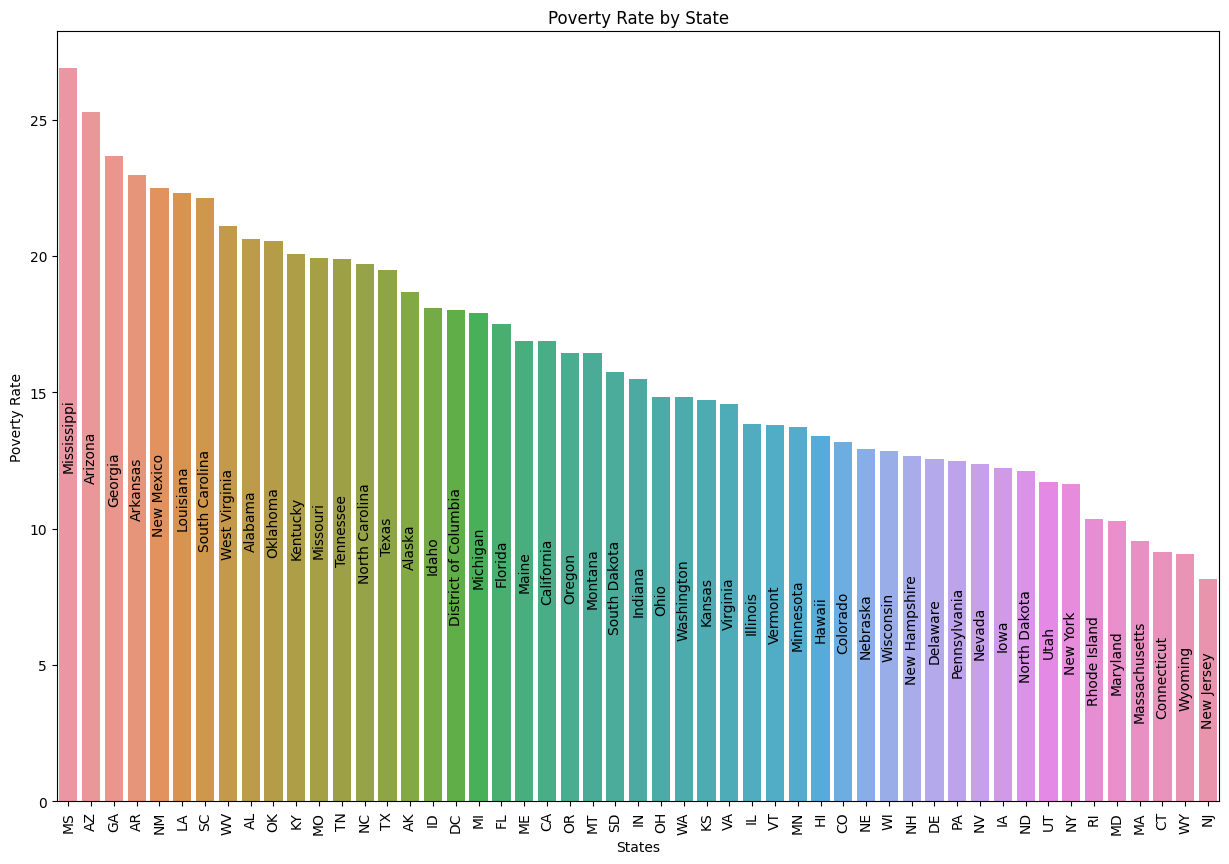

In [9]:
"""
    This code calculates the poverty rate for each state and sorts the states by their poverty rates. Here's a brief explanation of what each part does:

    * Replaces '-' in the poverty_rate column with 0.0 and converts the column to a float type.
    * Creates a list of unique state names (area_list).
    * For each state, calculates the average poverty rate and stores it in area_poverty_ratio.
    * Creates a DataFrame with states and their corresponding poverty rates.
    * Sorts the DataFrame by poverty rates in descending order and reindexes it.
    * The final result is a sorted DataFrame showing states ranked by their poverty rates.
"""
# Replace '-' with 0.0 and convert poverty_rate to float
percentage_people_below_poverty_level.poverty_rate.replace(['-'], 0.0, inplace=True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

# Calculate poverty rate for each state
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for area in area_list:
    area_data = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area'] == area]
    area_poverty_rate = area_data.poverty_rate.mean()
    area_poverty_ratio.append(area_poverty_rate)

# Create DataFrame and sort by poverty rate
data = pd.DataFrame({'area_list': area_list, 'area_poverty_ratio': area_poverty_ratio})
sorted_data = data.sort_values(by='area_poverty_ratio', ascending=False)

# Map state abbreviations to full names
sorted_data['area_list_full'] = sorted_data['area_list'].map(state_names)

# Visualization
plt.figure(figsize=(15,10))
bar_plot = sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])

# Add full state names inside the bars with vertical rotation
for patch, label in zip(bar_plot.patches, sorted_data['area_list_full']):
    bar_plot.text(patch.get_x() + patch.get_width() / 2, patch.get_height() / 2, label, color='black', ha="center", va="center", rotation=90)

plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate by State')
plt.show()

* Most common 15 Name or Surname of killed people

In [10]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [11]:
kill.name.value_counts()

name
TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: count, Length: 2481, dtype: int64

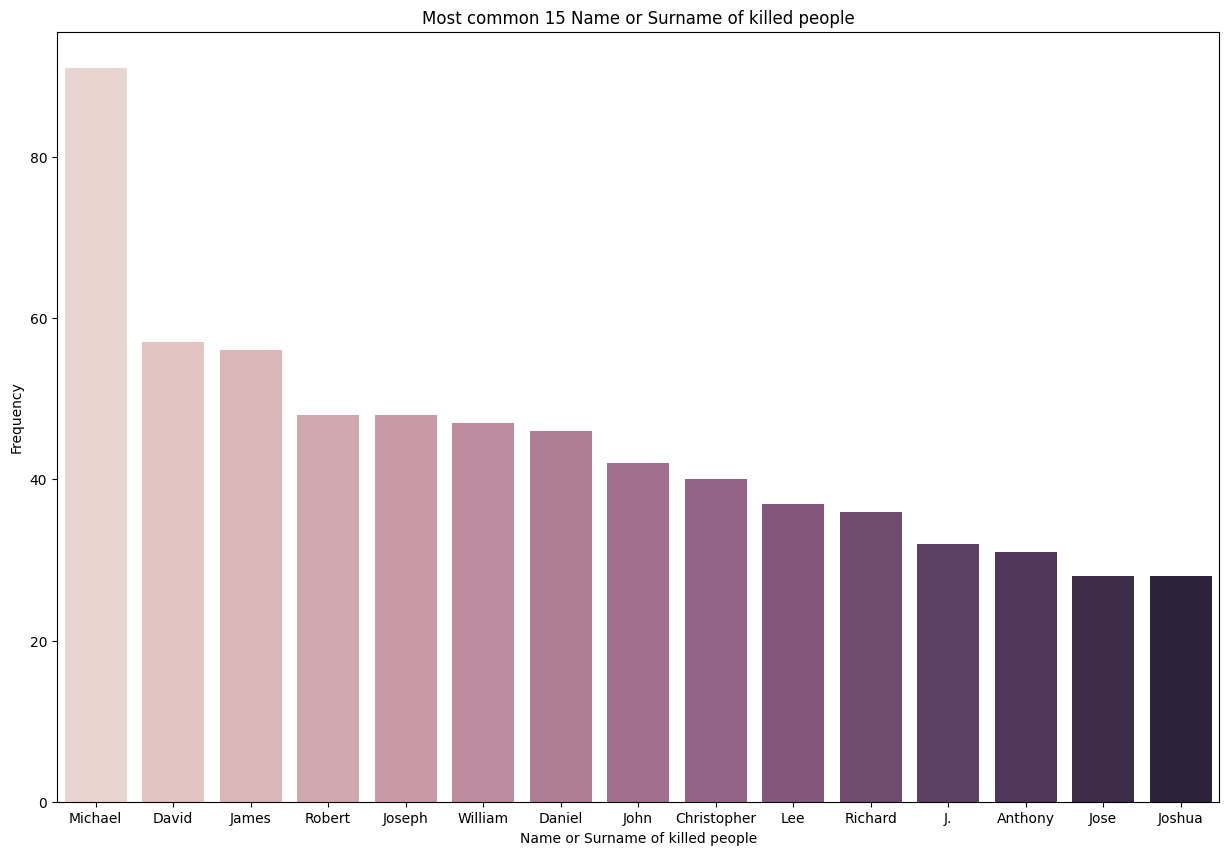

In [12]:
"""
    This script finds the 15 most common first or last names of killed people from the 'kill' dataset. 
    It filters out entries with the name 'TK TK', splits the remaining names into first and last names, counts the frequency of each name, and then visualizes the top 15 names using a bar plot.

    Explanation:
    * The script filters out entries with the name 'TK TK' and splits the remaining names into first and last names.
    * It then combines the first and last names into a single list and counts the frequency of each name using `Counter`.
    * The 15 most common names and their frequencies are extracted and stored in separate lists.
    * Finally, a bar plot is created to visualize the most common names along with their frequencies.
"""

# Separate the names and split them into first and last names
separate = kill.name[kill.name != 'TK TK'].str.split() 

# Unzip the first and last names into separate lists
a, b = zip(*separate) 

# Combine the first and last names into one list
name_list = a + b 

# Count the frequency of each name
name_count = Counter(name_list) 

# Get the 15 most common names and their counts
most_common_names = name_count.most_common(15) 

# Separate the names and their counts into two lists
x, y = zip(*most_common_names)
x, y = list(x), list(y)

# Create the bar plot
plt.figure(figsize=(15,10))
ax = sns.barplot(x=x, y=y, palette=sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')
plt.show()

* High school graduation rate of the population that is older than 25 in states

In [13]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [14]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

percent_completed_hs
100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: count, Length: 728, dtype: int64

In [15]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


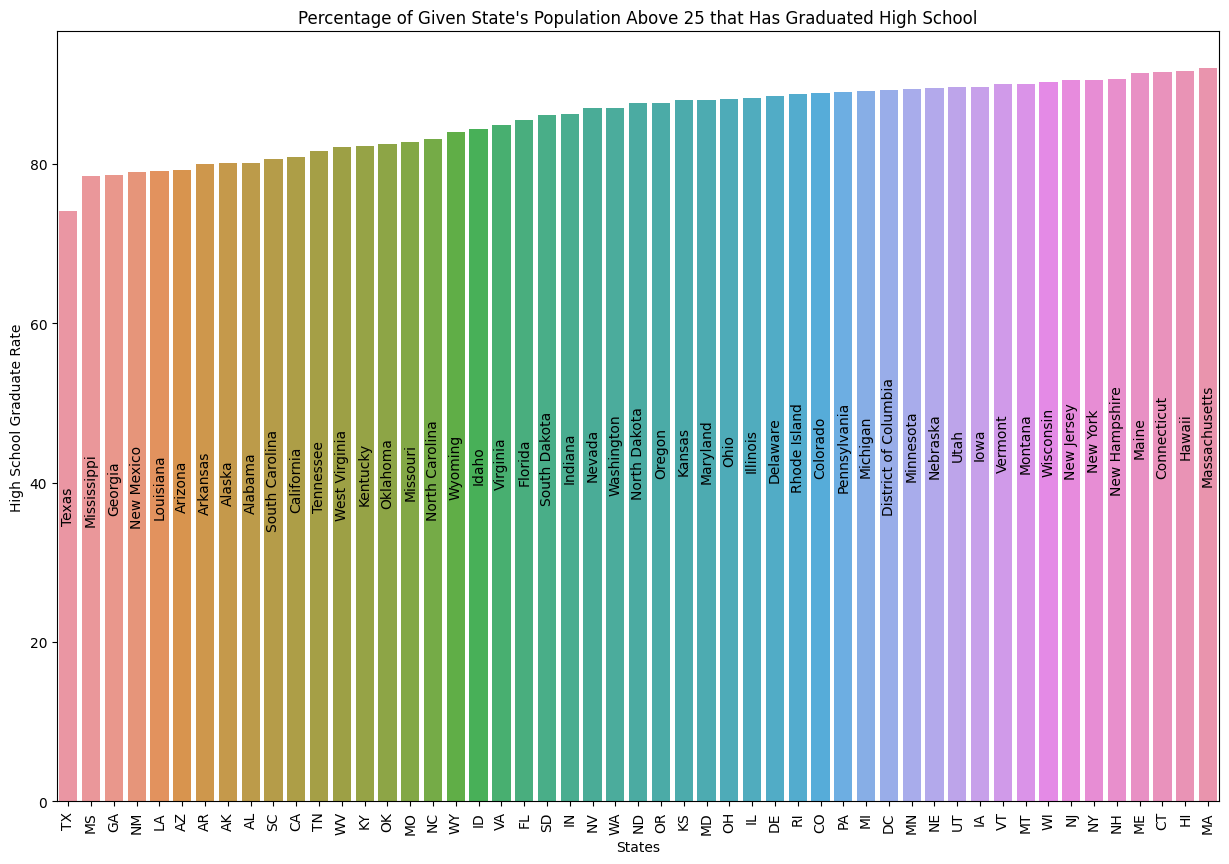

In [16]:
"""
    This script calculates the high school graduation rate for each state from the 'percent_over_25_completed_highSchool' dataset. It replaces missing values, calculates the average high school graduation rate for each state, sorts the states by this rate, and then visualizes the sorted rates using a bar plot with full state names inside the bars.

    Explanation:
    * The script replaces '-' in the 'percent_completed_hs' column with 0.0 and converts the column to float.
    * It calculates the average high school graduation rate for each state.
    * The states are sorted by their high school graduation rates in ascending order.
    * A bar plot is created to visualize the high school graduation rates for each state with full state names inside the bars.
"""

# Replace '-' with 0.0 and convert percent_completed_hs to float
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'], 0.0, inplace=True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)

# Calculate high school graduation rate for each state
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for area in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area'] == area]
    area_highschool_rate = sum(x.percent_completed_hs) / len(x)
    area_highschool.append(area_highschool_rate)

# Create DataFrame and sort by high school graduation rate
data = pd.DataFrame({'area_list': area_list, 'area_highschool_ratio': area_highschool})
new_index = data['area_highschool_ratio'].sort_values(ascending=True).index.values
sorted_data2 = data.reindex(new_index)

# Map state abbreviations to full names
sorted_data2['area_list_full'] = sorted_data2['area_list'].map(state_names)

# Visualization
plt.figure(figsize=(15,10))
bar_plot = sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])

# Add full state names inside the bars
for patch, label in zip(bar_plot.patches, sorted_data2['area_list_full']):
    bar_plot.text(patch.get_x() + patch.get_width() / 2, patch.get_height() / 2, label, color='black', ha="center", va="center", rotation=90)

plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")
plt.show()

* Percentage of state's population according to races that are black,white,native american, asian and hispanic

In [17]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [18]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


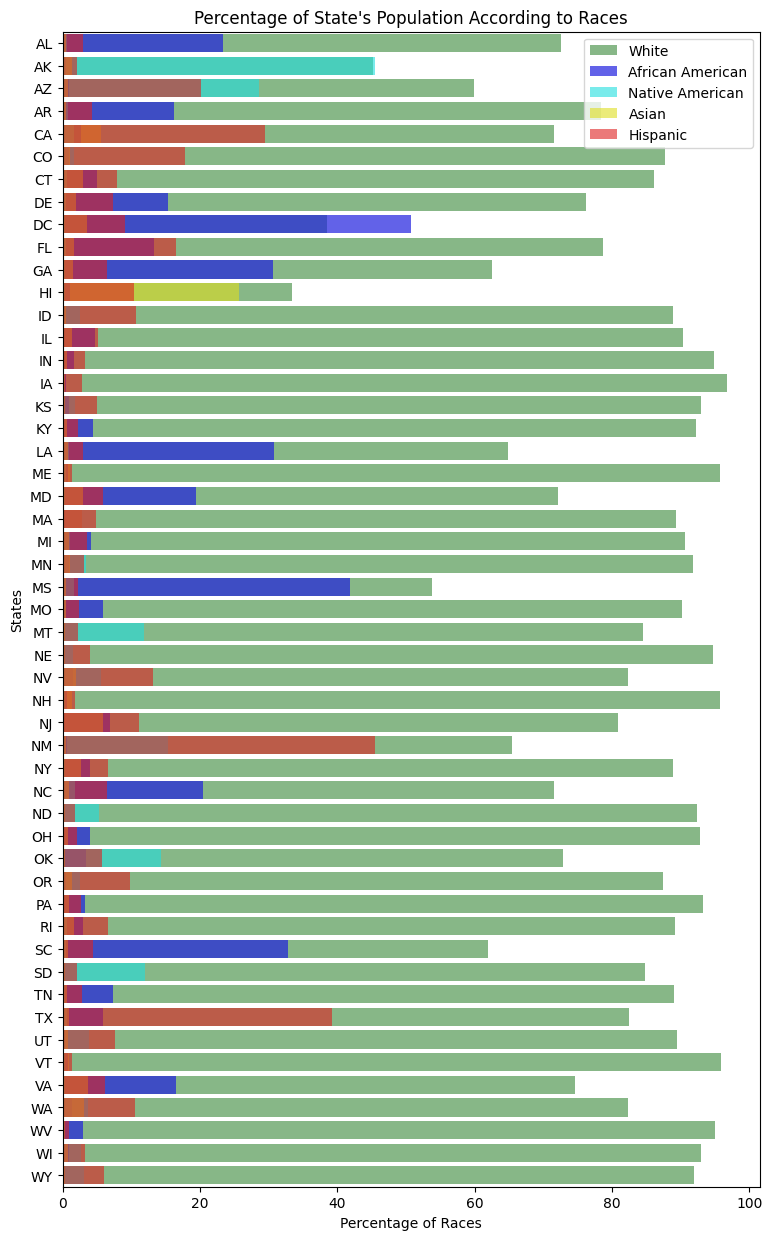

In [19]:
"""
    This script calculates the average racial composition for each state from the 'share_race_city' dataset. 
    It replaces missing values, calculates the average percentage for each race by state, and then visualizes the data using a layered bar plot.

    Explanation:
    - The script replaces '-' and '(X)' in the dataset with 0.0 and converts the relevant columns to float.
    - It calculates the average percentage of each race (White, Black, Native American, Asian, Hispanic) for each state.
    - A layered bar plot is created to visualize the racial composition of each state.
"""

# Replace '-' and '(X)' with 0.0 and convert relevant columns to float
share_race_city.replace(['-'], 0.0, inplace=True)
share_race_city.replace(['(X)'], 0.0, inplace=True)
share_race_city.loc[:, ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = share_race_city.loc[:, ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].astype(float)

# Calculate average percentage for each race by state
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for area in area_list:
    x = share_race_city[share_race_city['Geographic area'] == area]
    share_white.append(sum(x.share_white) / len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

# Visualization
f, ax = plt.subplots(figsize=(9, 15))
sns.barplot(x=share_white, y=area_list, color='green', alpha=0.5, label='White')
sns.barplot(x=share_black, y=area_list, color='blue', alpha=0.7, label='African American')
sns.barplot(x=share_native_american, y=area_list, color='cyan', alpha=0.6, label='Native American')
sns.barplot(x=share_asian, y=area_list, color='yellow', alpha=0.6, label='Asian')
sns.barplot(x=share_hispanic, y=area_list, color='red', alpha=0.6, label='Hispanic')

ax.legend(loc='upper right', frameon=True)  # Show legend
ax.set(xlabel='Percentage of Races', ylabel='States', title="Percentage of State's Population According to Races")
plt.show()

<a id="2"></a> 
## Point Plot

- High school graduation rate vs Poverty rate of each state

In [20]:
sorted_data.head()

,area_list,area_poverty_ratio,area_list_full
24,MS,26.884254,Mississippi
2,AZ,25.268071,Arizona
10,GA,23.663636,Georgia
3,AR,22.963216,Arkansas
31,NM,22.507675,New Mexico


In [21]:
sorted_data2.head()

,area_list,area_highschool_ratio,area_list_full
43,TX,74.086949,Texas
24,MS,78.470718,Mississippi
10,GA,78.634450,Georgia
31,NM,78.971783,New Mexico
18,LA,79.122363,Louisiana


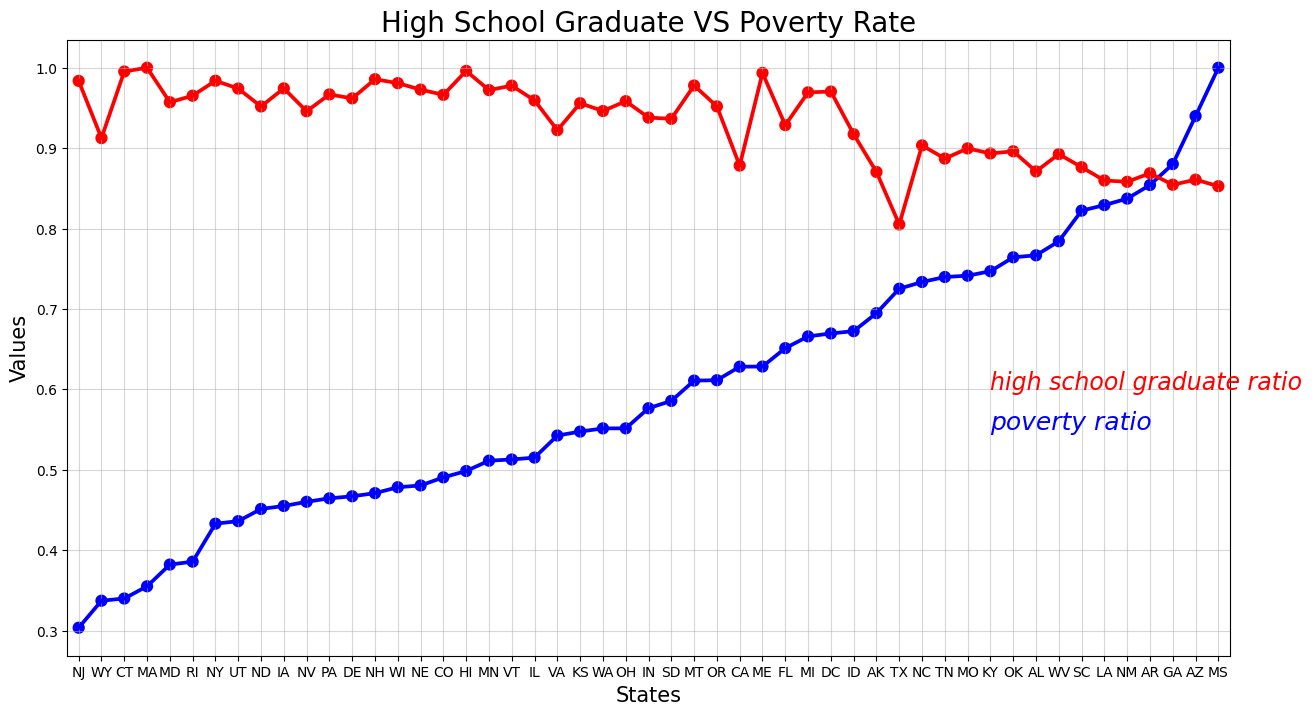

In [22]:
"""
    This script analyzes and visualizes the relationship between high school graduation rates and poverty rates across different states.
    It normalizes the poverty and high school graduation rates, merges the datasets, and then sorts the data by poverty rate. Finally, it visualizes the data using point plots.

    Explanation:
    - The script first normalizes the 'area_poverty_ratio' and 'area_highschool_ratio' columns by dividing each value by the maximum value in their respective columns.
    - The normalized high school graduation rate data is then concatenated with the poverty rate data.
    - The combined data is sorted based on the normalized poverty rate.
    - A point plot is created using Seaborn to visualize both the poverty rate and high school graduation rate for each state.
    - The plot includes labels for the x-axis (States) and y-axis (Values), as well as a title and grid for better readability.
    - The high school graduation rates are plotted in red, while the poverty rates are plotted in blue, with corresponding text annotations.

    The final plot provides a clear visual representation of how poverty rates and high school graduation rates vary across different states.
"""

# Normalize the area_poverty_ratio and area_highschool_ratio columns by dividing by their maximum values
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio'] / max(sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio'] / max(sorted_data2['area_highschool_ratio'])

# Concatenate the normalized high school graduation rate data with the poverty rate data
data = pd.concat([sorted_data, sorted_data2['area_highschool_ratio']], axis=1)

# Sort the combined data by the normalized poverty rate
data.sort_values('area_poverty_ratio', inplace=True)

# Visualize the data
f, ax1 = plt.subplots(figsize=(15, 8))

# Create point plots for poverty rate and high school graduation rate
sns.pointplot(x='area_list', y='area_poverty_ratio', data=data, color='blue')
sns.pointplot(x='area_list', y='area_highschool_ratio', data=data, color='red')

# Add text annotations for the plotted lines and set labels and title
plt.text(40, 0.6, 'high school graduate ratio', color='red', fontsize=17, style='italic')
plt.text(40, 0.55, 'poverty ratio', color='blue', fontsize=18, style='italic')
plt.xlabel('States', fontsize=15, color='black')
plt.ylabel('Values', fontsize=15, color='black')
plt.title('High School Graduate VS Poverty Rate', fontsize=20, color='black')

# Add a grid with some transparency and show the plot
plt.grid(alpha=0.5)
plt.show()

<a id="3"></a> 
## Joint Plot

- Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code

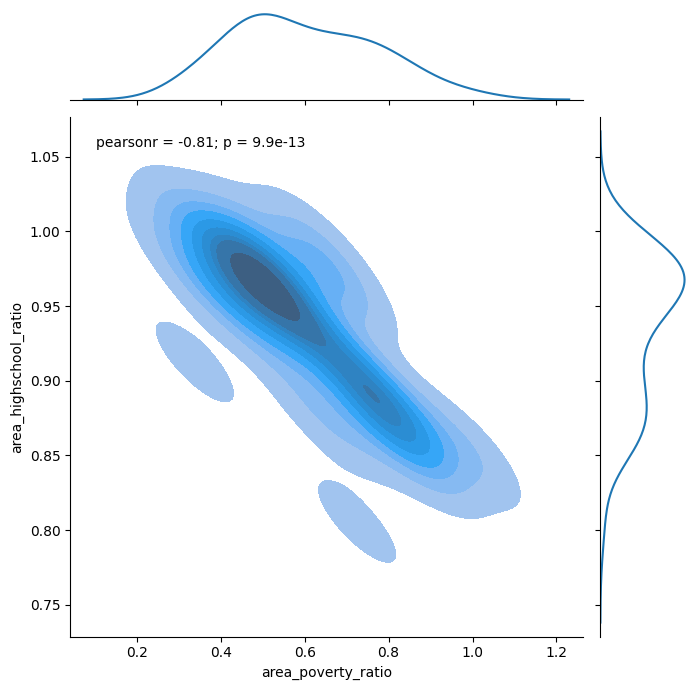

In [23]:
"""
    This script visualizes the relationship between high school graduation rates and poverty rates of each state using different styles of Seaborn plots. It demonstrates the use of joint kernel density estimation and the Pearson correlation coefficient.

    Explanation:
    - The script first creates a joint plot to show the joint distribution using kernel density estimation (KDE).
    - The Pearson correlation coefficient is indicated by 'pearsonr'. A value of 1 indicates a positive correlation, -1 indicates a negative correlation, and 0 indicates no correlation between the variables.
    - The joint plot is saved as 'graph.png' and displayed.

    - The data is displayed using `data.head()` to show the first few rows of the dataset.

    - The script then demonstrates different usage of parameters for the joint plot, showing how to change the plot style.
    - Different kinds of joint plots can be created by changing the 'kind' parameter. Options include: "scatter", "reg" (regression), "resid" (residuals), "kde" (kernel density estimation), and "hex" (hexbin).
    - A second joint plot is created with specific parameters: kind is set to "kde", size is set to 5, ratio is set to 3, and color is set to red.

    The final visualizations provide insights into the relationship between high school graduation rates and poverty rates across different states, with the ability to explore this relationship through various types of joint plots.
"""

# Calculate Pearson correlation coefficient and p-value
corr, p_value = pearsonr(data['area_poverty_ratio'], data['area_highschool_ratio'])

# Show the joint distribution using kernel density estimation (KDE)
g = sns.jointplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data, kind="kde", height=7, shade = True)

# Add the Pearson correlation coefficient and p-value to the plot
plt.annotate(f'pearsonr = {corr:.2f}; p = {p_value:.1e}', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='center')
plt.savefig('graph.png')
plt.show()

<a id="4"></a> 
## Pie Chart

- Race rates according in kill data

In [24]:
kill.race.head(15)

0     A
1     W
2     H
3     W
4     H
5     W
6     H
7     W
8     W
9     B
10    W
11    B
12    B
13    W
14    B
Name: race, dtype: object

In [25]:
kill.race.value_counts()

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: count, dtype: int64

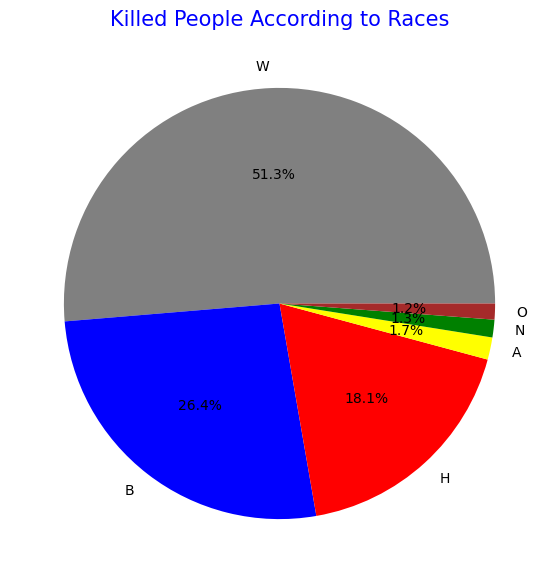

In [26]:
"""
    This script visualizes the distribution of killed people according to their races using a pie chart.

    Explanation:
    - Removes missing values in the 'kill.race' column.
    - Determines the labels and sizes for the pie chart slices.
    - Defines colors and explosion settings for the slices.
    - Creates and customizes the pie chart with labels, colors, and percentage values.
    - Sets the title of the chart.

    The pie chart provides a clear visual representation of the racial distribution of killed people.
"""

# Ensure there are no missing values in 'kill.race'
kill.race.dropna(inplace=True)

# Determine the labels and sizes for the pie chart
labels = kill.race.value_counts().index
sizes = kill.race.value_counts().values

# Define colors for the pie chart slices
colors = ['grey', 'blue', 'red', 'yellow', 'green', 'brown']
# Define explode to slightly separate the slices (all set to 0 for no separation)
explode = [0, 0, 0, 0, 0, 0]

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Killed People According to Races', color='blue', fontsize=15)

# Show the plot
plt.show()

<a id="5"></a> 
## LM Plot

- Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code

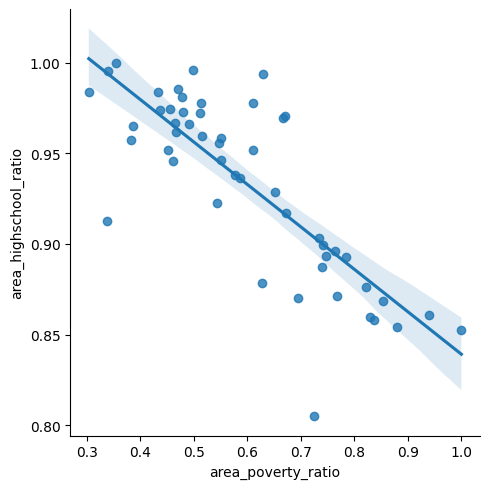

In [27]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data)
plt.show()

<a id="6"></a> 
## Kde Plot

- Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code

In [28]:
data.head()

,area_list,area_poverty_ratio,area_list_full,area_highschool_ratio
30,NJ,0.303558,New Jersey,0.983615
50,WY,0.337139,Wyoming,0.912479
6,CT,0.339883,Connecticut,0.995254
21,MA,0.355090,Massachusetts,1.000000
20,MD,0.382097,Maryland,0.957107


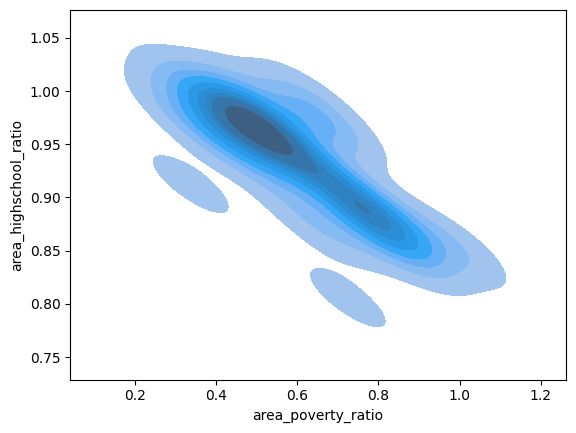

In [29]:
# cubehelix plot
sns.kdeplot(x = data.area_poverty_ratio, y = data.area_highschool_ratio, shade=True, cut=3)
plt.show()

<a id="7"></a> 
## Violin Plot

- Show each distribution with both violins and points

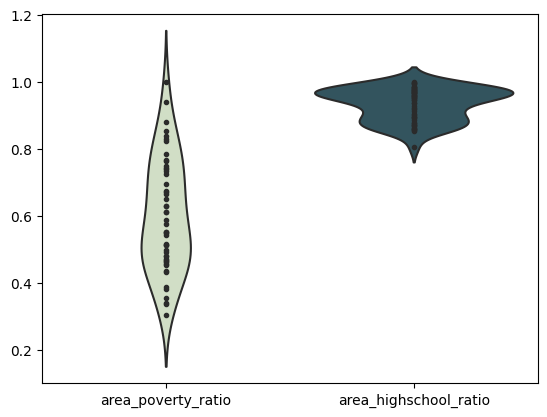

In [30]:
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

1. area_poverty_ratio:

    * The violin plot on the left represents the distribution of the area poverty ratio.
    
    * The plot shows a wide range, with values spanning from approximately 0.2 to 1.1.
    
    * The density is higher around the central values (around 0.8), indicating that many data points are concentrated around this area.
    
    * The black points within the plot show the individual data points, indicating their distribution.

2. area_highschool_ratio:

    * The violin plot on the right represents the distribution of the area high school ratio.
    
    * The plot indicates a narrower range of values, primarily between 0.7 and 1.0.
    
    * The distribution seems to be more uniform compared to the area poverty ratio.
    
    * Again, the black points within the plot represent the individual data points.

* General Observations:

    * The area poverty ratio displays a wider and more varied distribution, suggesting greater variability in the poverty levels across different areas.
    
    * The area high school ratio has a more concentrated distribution, suggesting more consistency in the high school ratio across different areas.
    
    * Both plots provide a good visual comparison of the distributions and central tendencies of these two ratios.

<a id="8"></a> 
## Heatmap

- Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code

In [31]:
# Selecting only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Displaying the correlation matrix
correlation_matrix

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


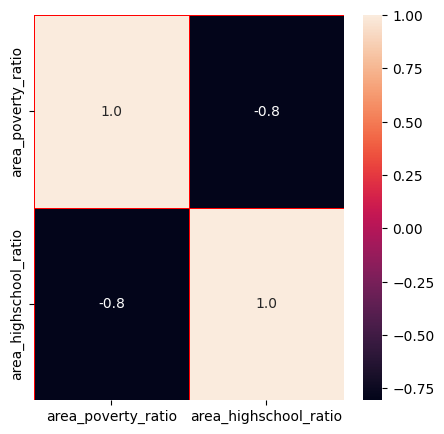

In [32]:
# correlation map
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(numerical_data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

<a id="9"></a> 
## Box Plot

In [33]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [34]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

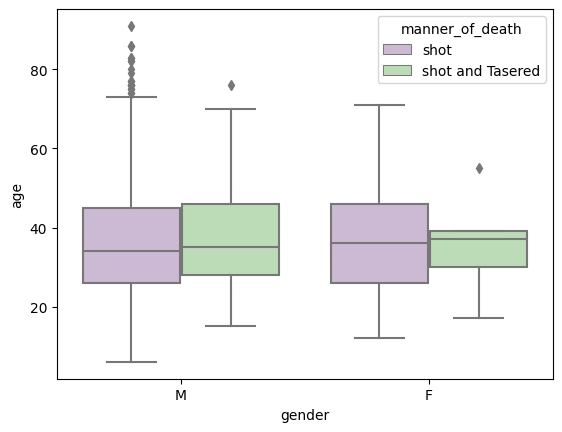

In [35]:
# manner of death: shot, shot and Tasered
# gender
# age
# Plot the orbital period with horizontal boxes
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")
plt.show()

* Males (M):

    * Both "shot" and "shot and Tasered" groups have similar median ages around 35-40.
    * The "shot" group has more outliers, with ages going up to 80+.
    * The interquartile range (IQR) is wider for the "shot" group compared to the "shot and Tasered" group.

* Females (F):

    * The median age is also around 35-40 for both groups.
    * The "shot and Tasered" group has fewer data points and a narrower IQR.
    * Outliers are present in both groups but are fewer compared to males.

* Comparison:

    * Males have a broader age distribution and more outliers than females in both manners of death.
    * The median ages are similar across genders and manners of death.

<a id="10"></a> 
## Swarm Plot

<a id="11"></a> 
## Pair Plot

<a id="12"></a> 
## Count Plot